Submitted by PARV KAUL

In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import math
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


mcdonalds = pd.read_csv('mcdonalds.csv')
mcdonalds.keys()
columns= list(mcdonalds.columns)
columns

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [8]:
df = pd.DataFrame(mcdonalds, columns= mcdonalds.keys())
Extracted_df= df.iloc[:,0:11]
Extracted_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [9]:
mapping = {"Yes": 1, "No": 0}

# Iterate over each column in the DataFrame
for column in Extracted_df.columns:
    # Check if the column has "Yes" and "No" values
    if set(Extracted_df[column].unique()) == {"Yes", "No"}:
        # Map "Yes" and "No" to 1 and 0
        Extracted_df[column] = Extracted_df[column].map(mapping)

# Print the updated DataFrame
print(Extracted_df)

      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting  
0             1        0           0  
1             1        0           0  
2     

In [10]:
Extracted_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [13]:
pca = PCA(n_components=11)
pca_components = pca.fit_transform(Extracted_df)
df_pca=pd.DataFrame(data=pca_components,columns=['PC1' ,'PC2' , 'PC3', 'PC4', 'PC5','PC6','PC7','PC8','PC9','PC10','PC11'])

In [14]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-0.425367,0.219079,-0.663255,-0.401300,-0.201705,0.389767,-0.211982,-0.163235,-0.181007,-0.515706,0.567074
1,0.218638,-0.388190,0.730827,-0.094724,-0.044669,0.086596,-0.095877,0.034756,-0.111476,-0.493313,0.500440
2,-0.375415,-0.730435,0.122040,0.692262,-0.839643,0.687406,0.583112,-0.364379,0.322288,-0.061759,-0.242741
3,0.172926,0.352752,0.843795,0.206998,0.681415,0.036133,-0.054284,0.231477,0.028003,0.250678,0.051034
4,-0.187057,0.807610,-0.028537,0.548332,-0.854074,0.097305,-0.457043,-0.171758,0.074409,-0.031897,-0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,-1.550242,-0.275031,0.013737,0.200604,0.145063,-0.306575,-0.075308,-0.345552,0.136589,0.432798,0.456076
1449,0.957339,-0.014308,-0.303843,0.444350,0.133690,-0.381804,-0.326432,-0.878047,0.304441,0.247443,0.193671
1450,0.185894,-1.062662,-0.220857,-0.467643,0.187757,0.192703,-0.091597,0.036576,-0.038255,-0.056518,0.012800
1451,1.182064,0.038570,-0.561561,0.701126,-0.047645,-0.193687,-0.027335,0.339374,-0.022267,0.002573,0.105316


In [15]:
# Print summary of PCA
print("Standard deviations:")
print(pca.explained_variance_)
print("\nProportion of variance:")
print(pca.explained_variance_ratio_)
print("\nCumulative proportion of variance:")
print(np.cumsum(pca.explained_variance_ratio_))

Standard deviations:
[0.57312398 0.36900226 0.2546408  0.15904032 0.11384214 0.09627033
 0.08392454 0.07569209 0.07035814 0.06192225 0.05612296]

Proportion of variance:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Cumulative proportion of variance:
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


C:\Users\acer\AppData\Local\Temp\ipykernel_12200\3379410871.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_components [:, 0], pca_components [:, 1],  cmap='plasma')


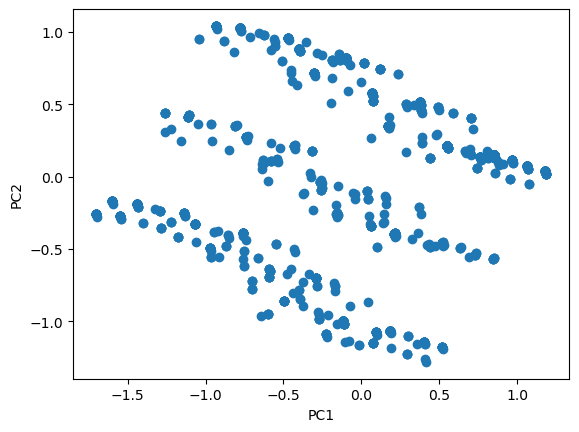

[[ 0.47693349  0.15533159  0.00635636 -0.11623168 -0.3044427   0.10849325
   0.33718593  0.47151394 -0.32904173  0.21371062 -0.37475293]
 [-0.36378978 -0.016414   -0.01880869  0.03409395  0.06383884  0.0869722
   0.61063276 -0.3073178  -0.60128596 -0.07659344  0.13965633]
 [ 0.30444402  0.0625153   0.03701866  0.32235949  0.80237317  0.06464172
   0.14931026  0.28726479 -0.02439661 -0.19205128  0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [ 0.30753507 -0.27760805 -0.07062017  0.07340475 -0.36139895 -0.10793025
   0.12897259  0.21089912  0.00312457 -0.28784553  0.72920859]
 [-0.17073819  0.34783006  0.3550866   0.40651542 -0.20934711  0.59463206
   0.10324067  0.07691443  0.26134151  0.17822612  0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03616962 -0.08684577
  -0.04044934  0.36045348 -0.06838452 -0.34961569 -0.02679159]
 [-0.01304117  0.11307868 -0.37593402 -0.5

In [16]:
# transformed data plotting
plt.scatter(pca_components [:, 0], pca_components [:, 1],  cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show();

# Projection Axes
projection_axes = pca.components_
print(projection_axes)

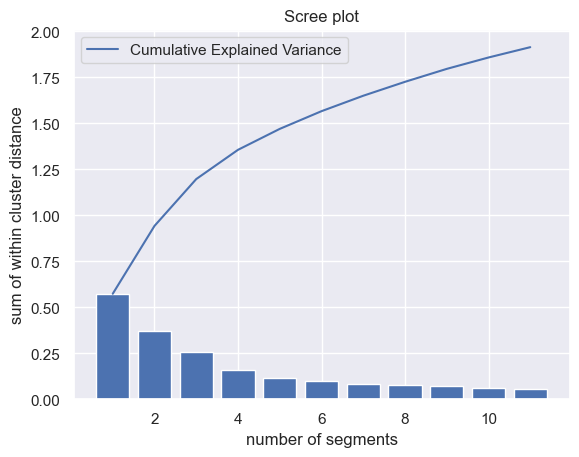

In [17]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
 
from sklearn.decomposition import PCA
sns.set()
 

plt.bar(range(1,len(pca.explained_variance_)+1),pca.explained_variance_)
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('number of segments')
plt.ylabel('sum of within cluster distance')
plt.title('Scree plot')
 
plt.show()

In [19]:
pip install bioinfokit

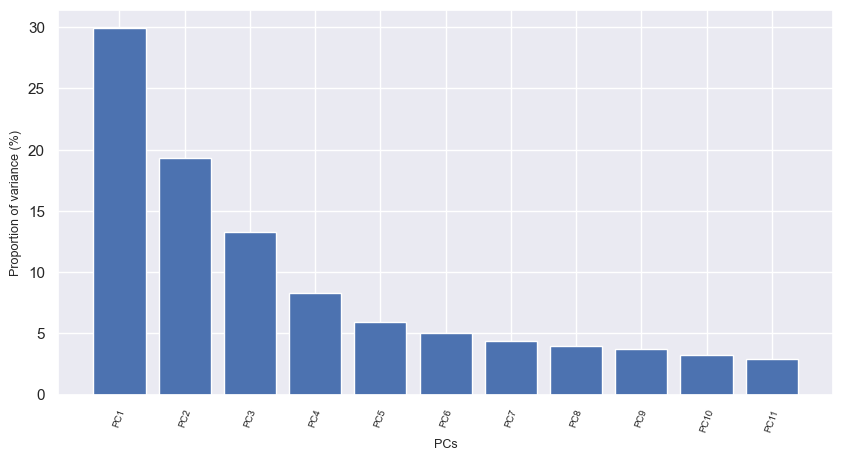

In [21]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[df_pca.columns, pca.explained_variance_ratio_],show=True,dim=(10,5))

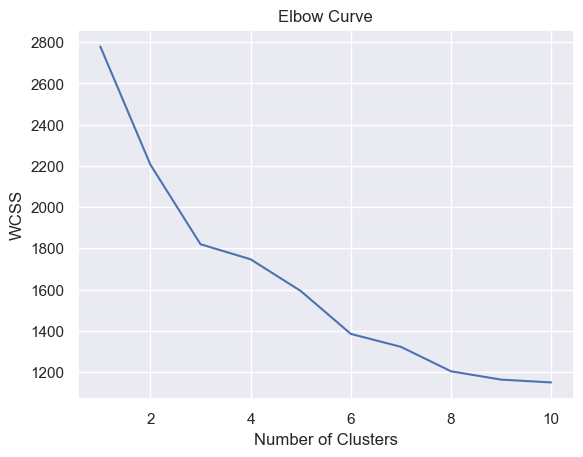

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have your data stored in a DataFrame called 'df'
# Modify the following line with your actual data

# Using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
pip install -U yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [29]:
# Create a KMeans object
kmeans2 = KMeans()

# Create a KElbowVisualizer object
visualizer = KElbowVisualizer(kmeans2, k=(1, 10))

# Fit the KMeans object to the Extracted_df data
visualizer.fit(df_pca)

# Show the plot
visualizer.show()

NameError: name 'KElbowVisualizer' is not defined

In [30]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(df_pca)

KMeans(n_clusters=4, random_state=42)

In [31]:
df_segm_pca_kmeans= pd.concat([Extracted_df,pd.DataFrame({'cluster':kmeans_pca.labels_})],axis=1)
df_segm_pca_kmeans

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,3
1,1,1,0,1,1,1,1,1,1,0,0,2
2,0,1,1,1,1,1,0,1,1,1,0,0
3,1,1,0,1,1,1,1,1,0,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,3
1449,1,1,0,1,0,0,1,1,0,1,0,1
1450,1,1,0,1,0,1,0,1,1,0,0,2
1451,1,1,0,0,0,1,1,1,0,1,0,1


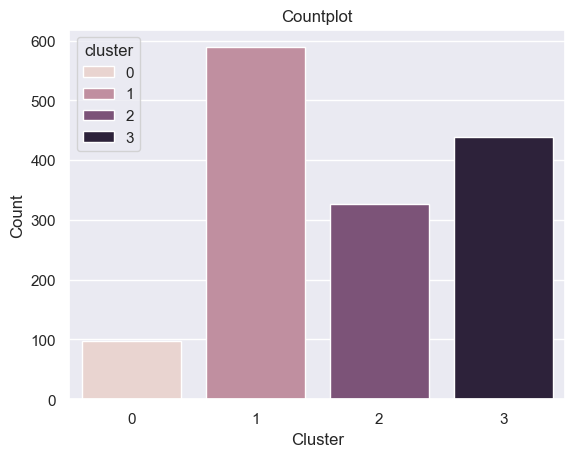

In [32]:
sns.countplot(data=df_segm_pca_kmeans, x='cluster', hue='cluster')

# Adding labels and title
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Countplot')

# Display the plot
plt.show()

In [33]:
df_segm_pca_kmeans['cluster'].value_counts(normalize=True)*100

cluster
1    40.536820
3    30.213352
2    22.505162
0     6.744666
Name: proportion, dtype: float64

In [34]:
# Filter the DataFrame for cluster 
cluster1_analysis = df_segm_pca_kmeans[df_segm_pca_kmeans['cluster'] == 0]

print(cluster1_analysis.head())

    yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
2       0           1      1          1       1     1      0      1   
6       1           1      1          1       0     1      0      1   
13      1           1      0          1       0     1      0      1   
27      0           1      0          1       1     1      0      1   
45      1           1      1          1       1     1      1      1   

    expensive  healthy  disgusting  cluster  
2           1        1           0        0  
6           1        1           0        0  
13          1        1           0        0  
27          0        1           0        0  
45          1        1           1        0  


C:\Users\acer\AppData\Local\Temp\ipykernel_12200\2075924465.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cluster1_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None, palette="icefire")


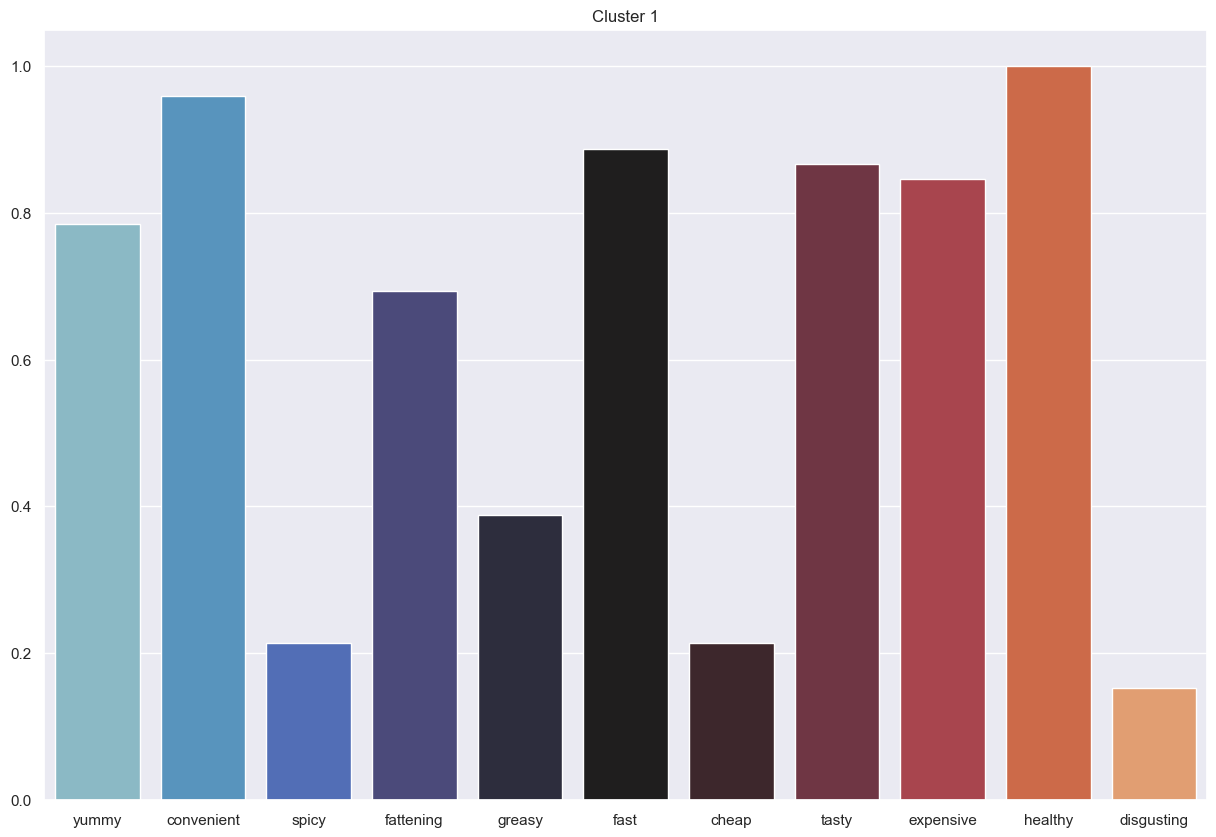

In [35]:
plt.figure(figsize=(15, 10))
sns.barplot(data=cluster1_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None, palette="icefire")
plt.title('Cluster 1')

plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_12200\2328427369.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cluster2_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None, palette="icefire")


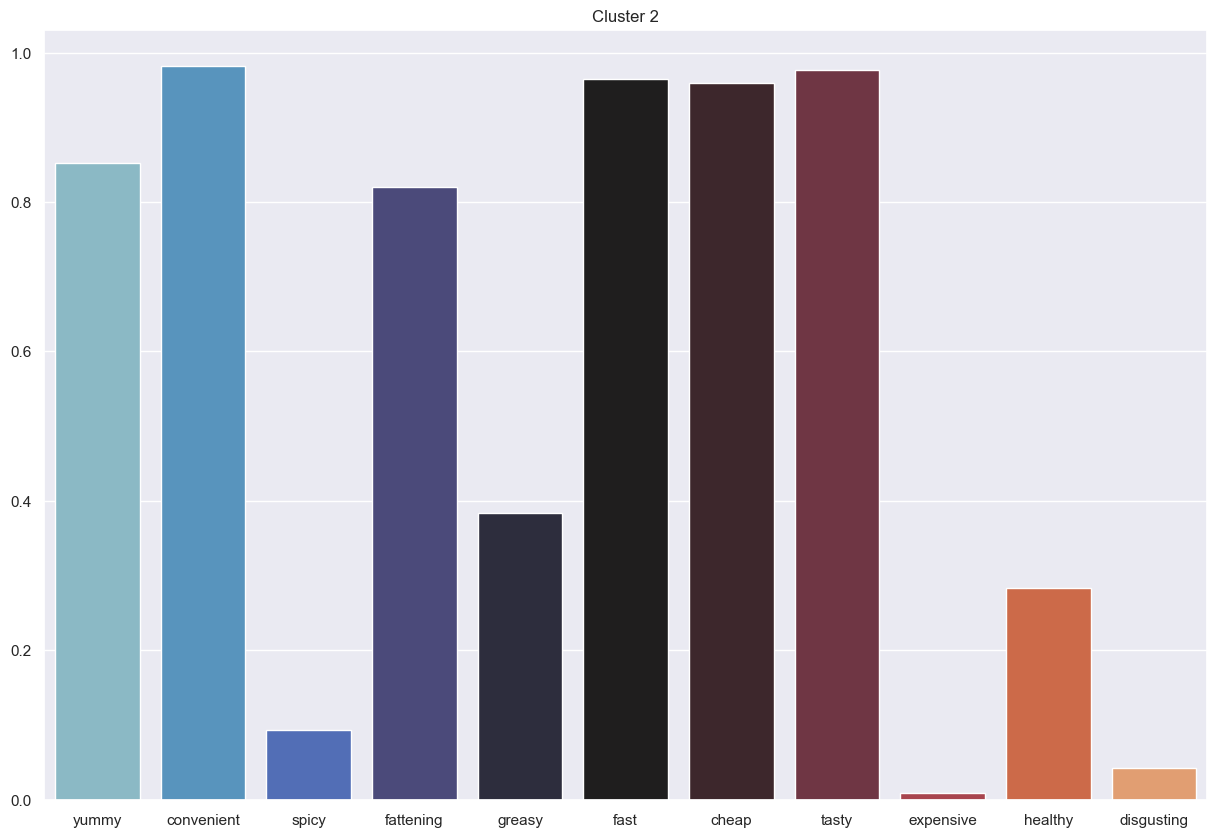

In [36]:
cluster2_analysis = df_segm_pca_kmeans[df_segm_pca_kmeans['cluster'] == 1]

plt.figure(figsize=(15, 10))
sns.barplot(data=cluster2_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None, palette="icefire")
plt.title('Cluster 2')

plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_12200\1458864591.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cluster3_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None, palette="icefire")


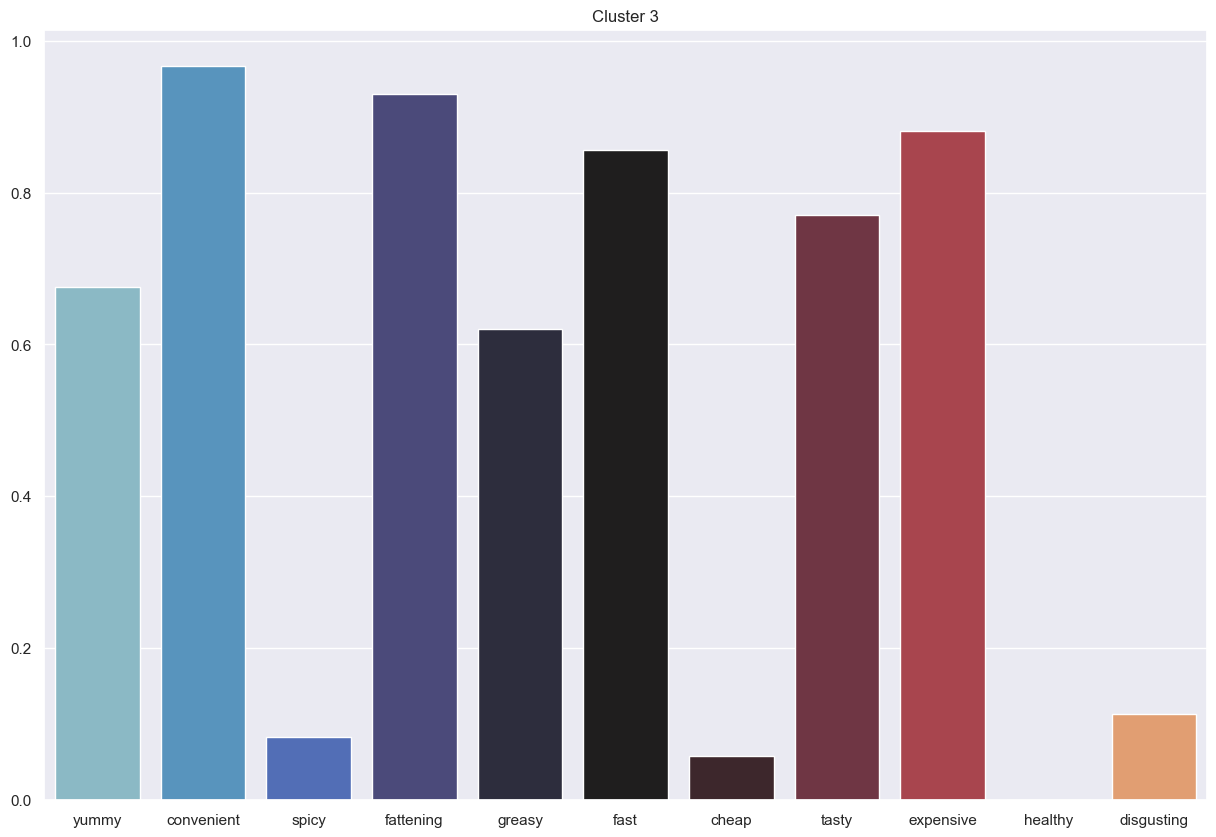

In [37]:
cluster3_analysis = df_segm_pca_kmeans[df_segm_pca_kmeans['cluster'] == 2]

plt.figure(figsize=(15, 10))
sns.barplot(data=cluster3_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None, palette="icefire")
plt.title('Cluster 3')

plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_12200\158134645.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cluster4_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None, palette="icefire")


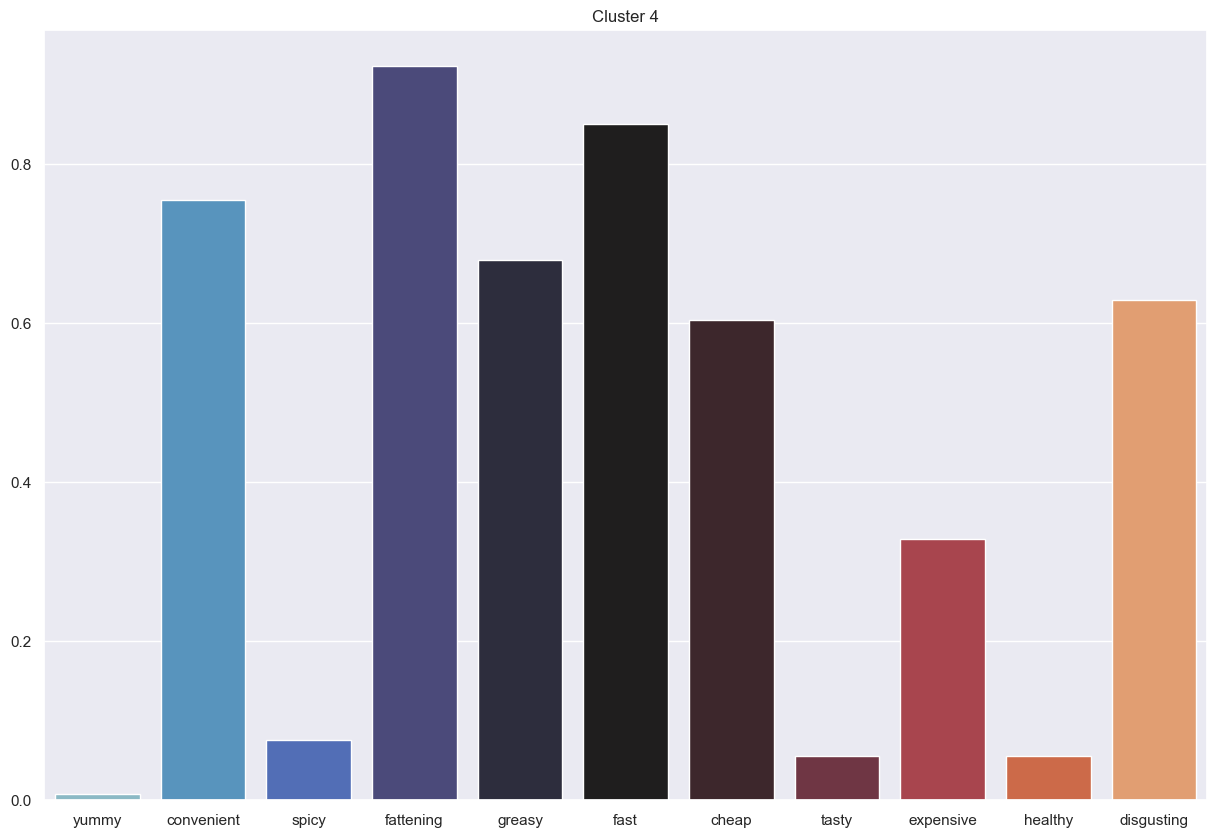

In [38]:
cluster4_analysis = df_segm_pca_kmeans[df_segm_pca_kmeans['cluster'] == 3]

plt.figure(figsize=(15, 10))
sns.barplot(data=cluster4_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None, palette="icefire")
plt.title('Cluster 4')

plt.show()

In [39]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [40]:
mapping = {"Yes": 1, "No": 0}

# Iterate over each column in the DataFrame
for column in Extracted_df.columns:
    # Check if the column has "Yes" and "No" values
    if set(df[column].unique()) == {"Yes", "No"}:
        # Map "Yes" and "No" to 1 and 0
        df[column] = df[column].map(mapping)

# Print the updated DataFrame
print(df)

      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting          Like  Age      VisitFrequency  \
0             1        0           0        

In [41]:
df['Like'] = df['Like'].replace({'I hate it!-5':0 ,'-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})
df.tail()

C:\Users\acer\AppData\Local\Temp\ipykernel_12200\3574437345.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Like'] = df['Like'].replace({'I hate it!-5':0 ,'-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,0,1,0,1,1,0,0,0,1,0,1,0,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,7,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,8,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,9,41,Every three months,Male
1452,0,1,0,1,1,0,0,0,1,0,1,2,30,Every three months,Male


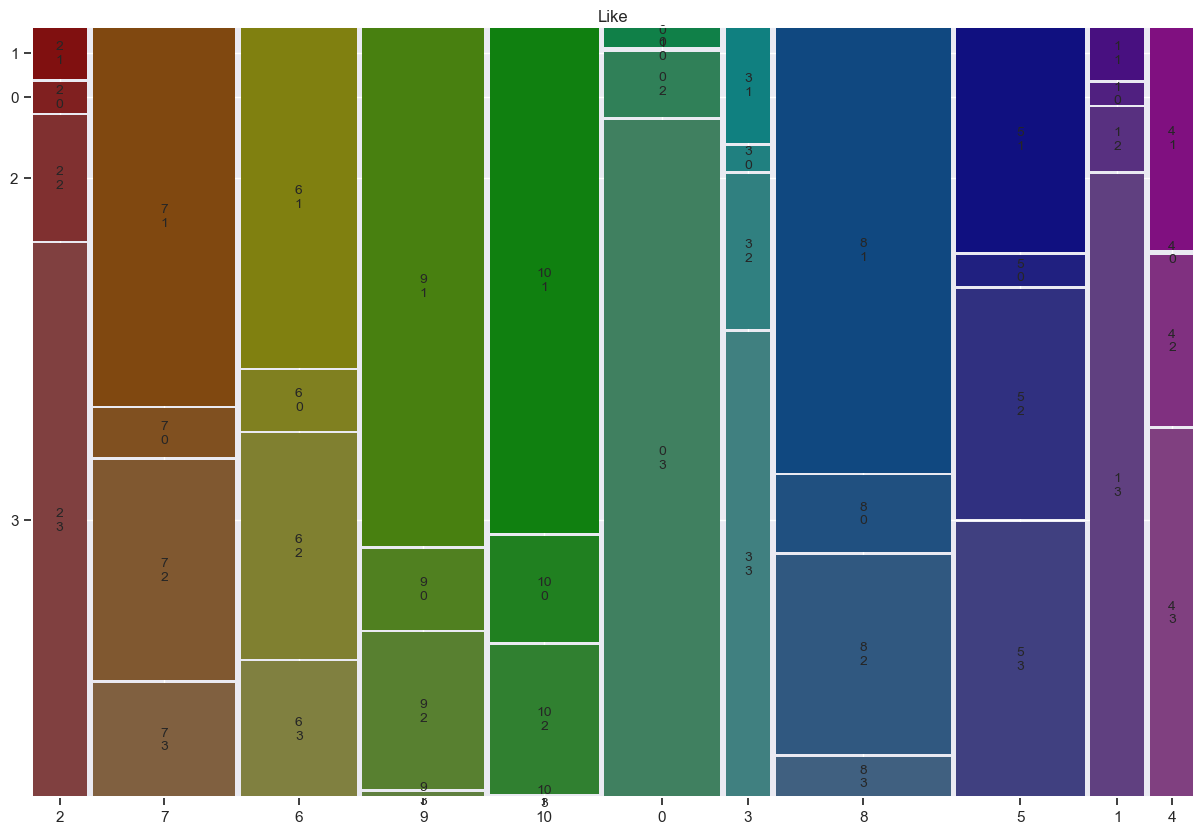

In [42]:
from statsmodels.graphics.mosaicplot import mosaic

df1 = pd.concat([df,pd.DataFrame({'cluster':kmeans_pca.labels_})],axis=1)
plt.rcParams['figure.figsize']=(15,10)
mosaic(df1,['Like','cluster'])
plt.xlabel('Like')
plt.show()

In [43]:
df1['Gender'].value_counts()

Gender
Female    788
Male      665
Name: count, dtype: int64

In [46]:
df1['Gender'] = df1['Gender'].replace({'Female':0, 'Male': 1})

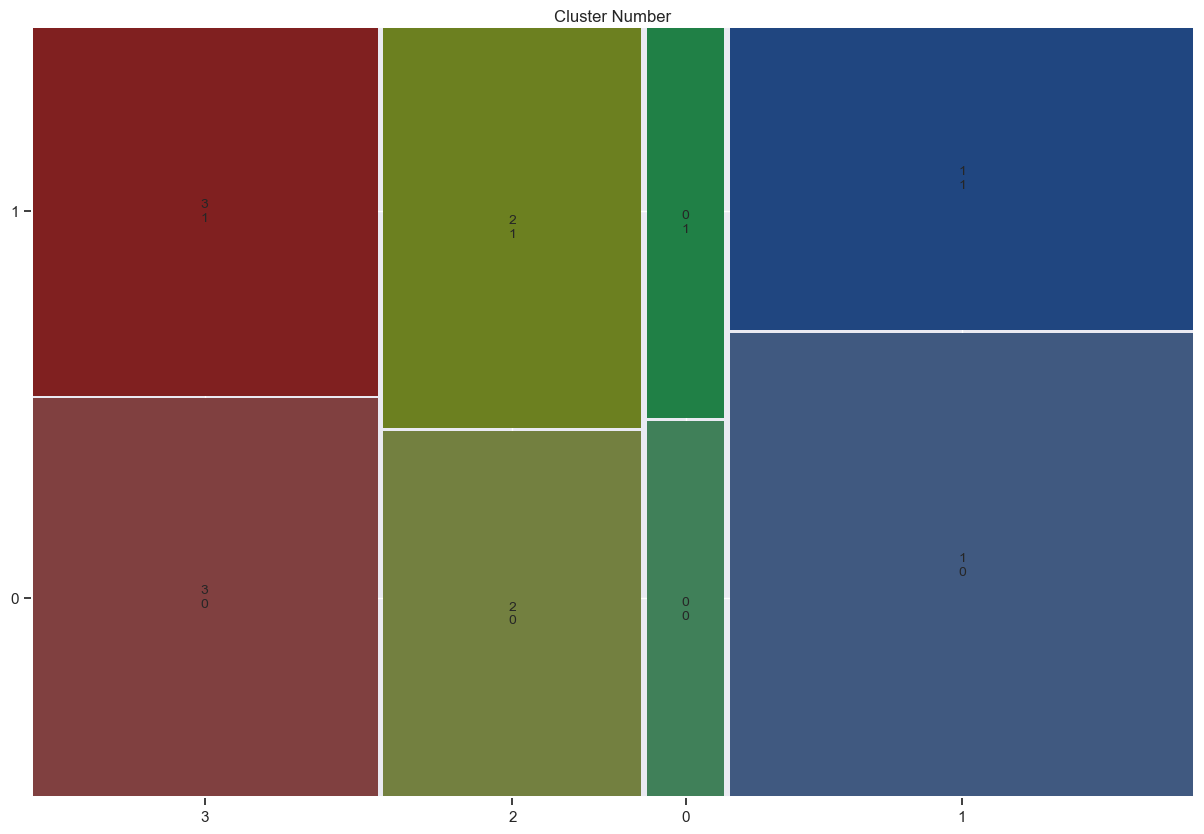

In [47]:
mosaic(df1,['cluster','Gender'])
plt.xlabel('Cluster Number')
plt.show()

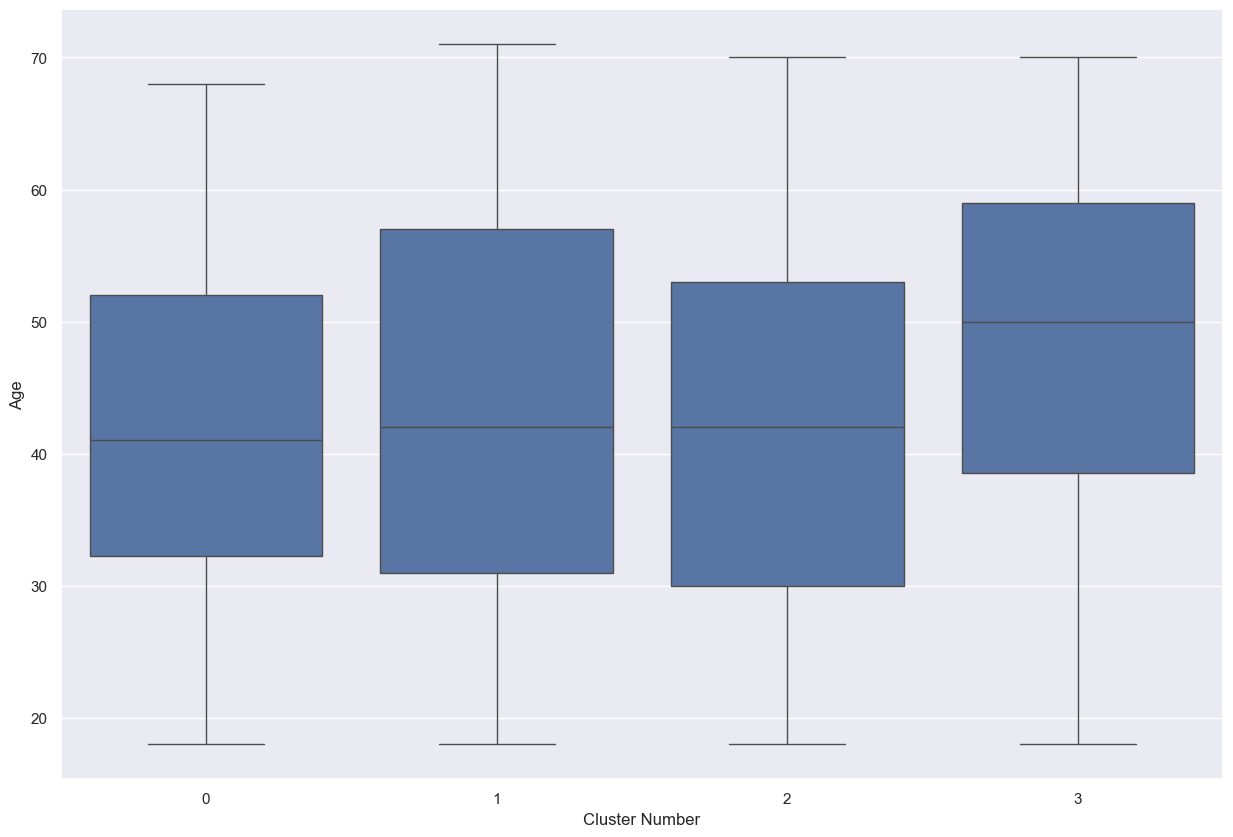

In [48]:
sns.boxplot(x=df1['cluster'], y=df1['Age'])
plt.xlabel('Cluster Number')
plt.show()

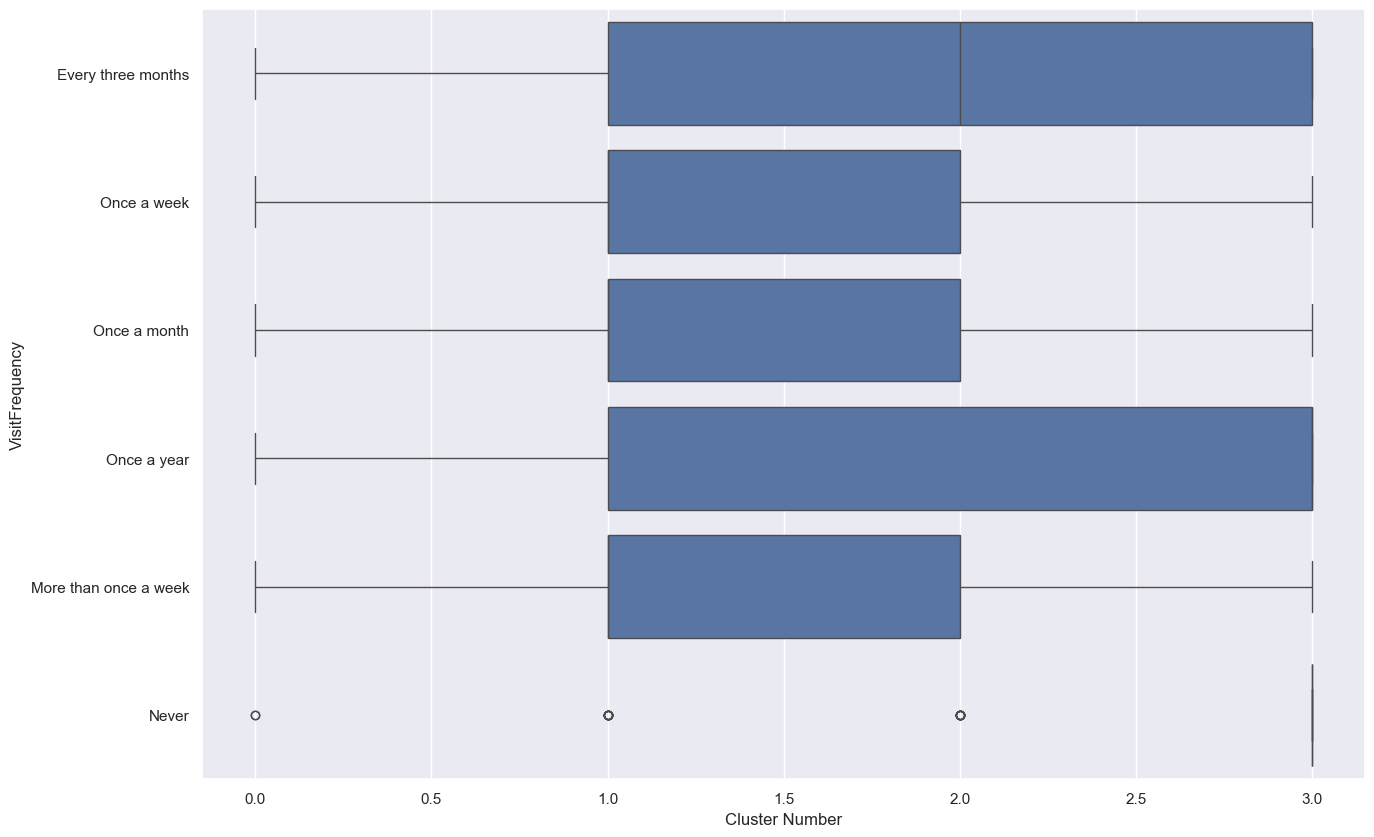

In [49]:
sns.boxplot(x=df1['cluster'], y=df1['VisitFrequency'])
plt.xlabel('Cluster Number')
plt.show()

In [50]:
df1['VisitFrequency'] = df1['VisitFrequency'].replace({'Never':0, 'Once a week':1, 'More than once a week':2, 'Once a month':3, 'Every three months':4, 'Once a year':5})
df1.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_12200\1617046018.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['VisitFrequency'] = df1['VisitFrequency'].replace({'Never':0, 'Once a week':1, 'More than once a week':2, 'Once a month':3, 'Every three months':4, 'Once a year':5})


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2,61,4,0,3
1,1,1,0,1,1,1,1,1,1,0,0,7,51,4,0,2
2,0,1,1,1,1,1,0,1,1,1,0,6,62,4,0,0
3,1,1,0,1,1,1,1,1,0,0,1,9,69,1,0,1
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,1,3


In [51]:
from sklearn.model_selection import train_test_split

X = df1.drop(['cluster'],axis=1)
y = df1[['cluster']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [52]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=1234)
model = decision_tree.fit(X, y)

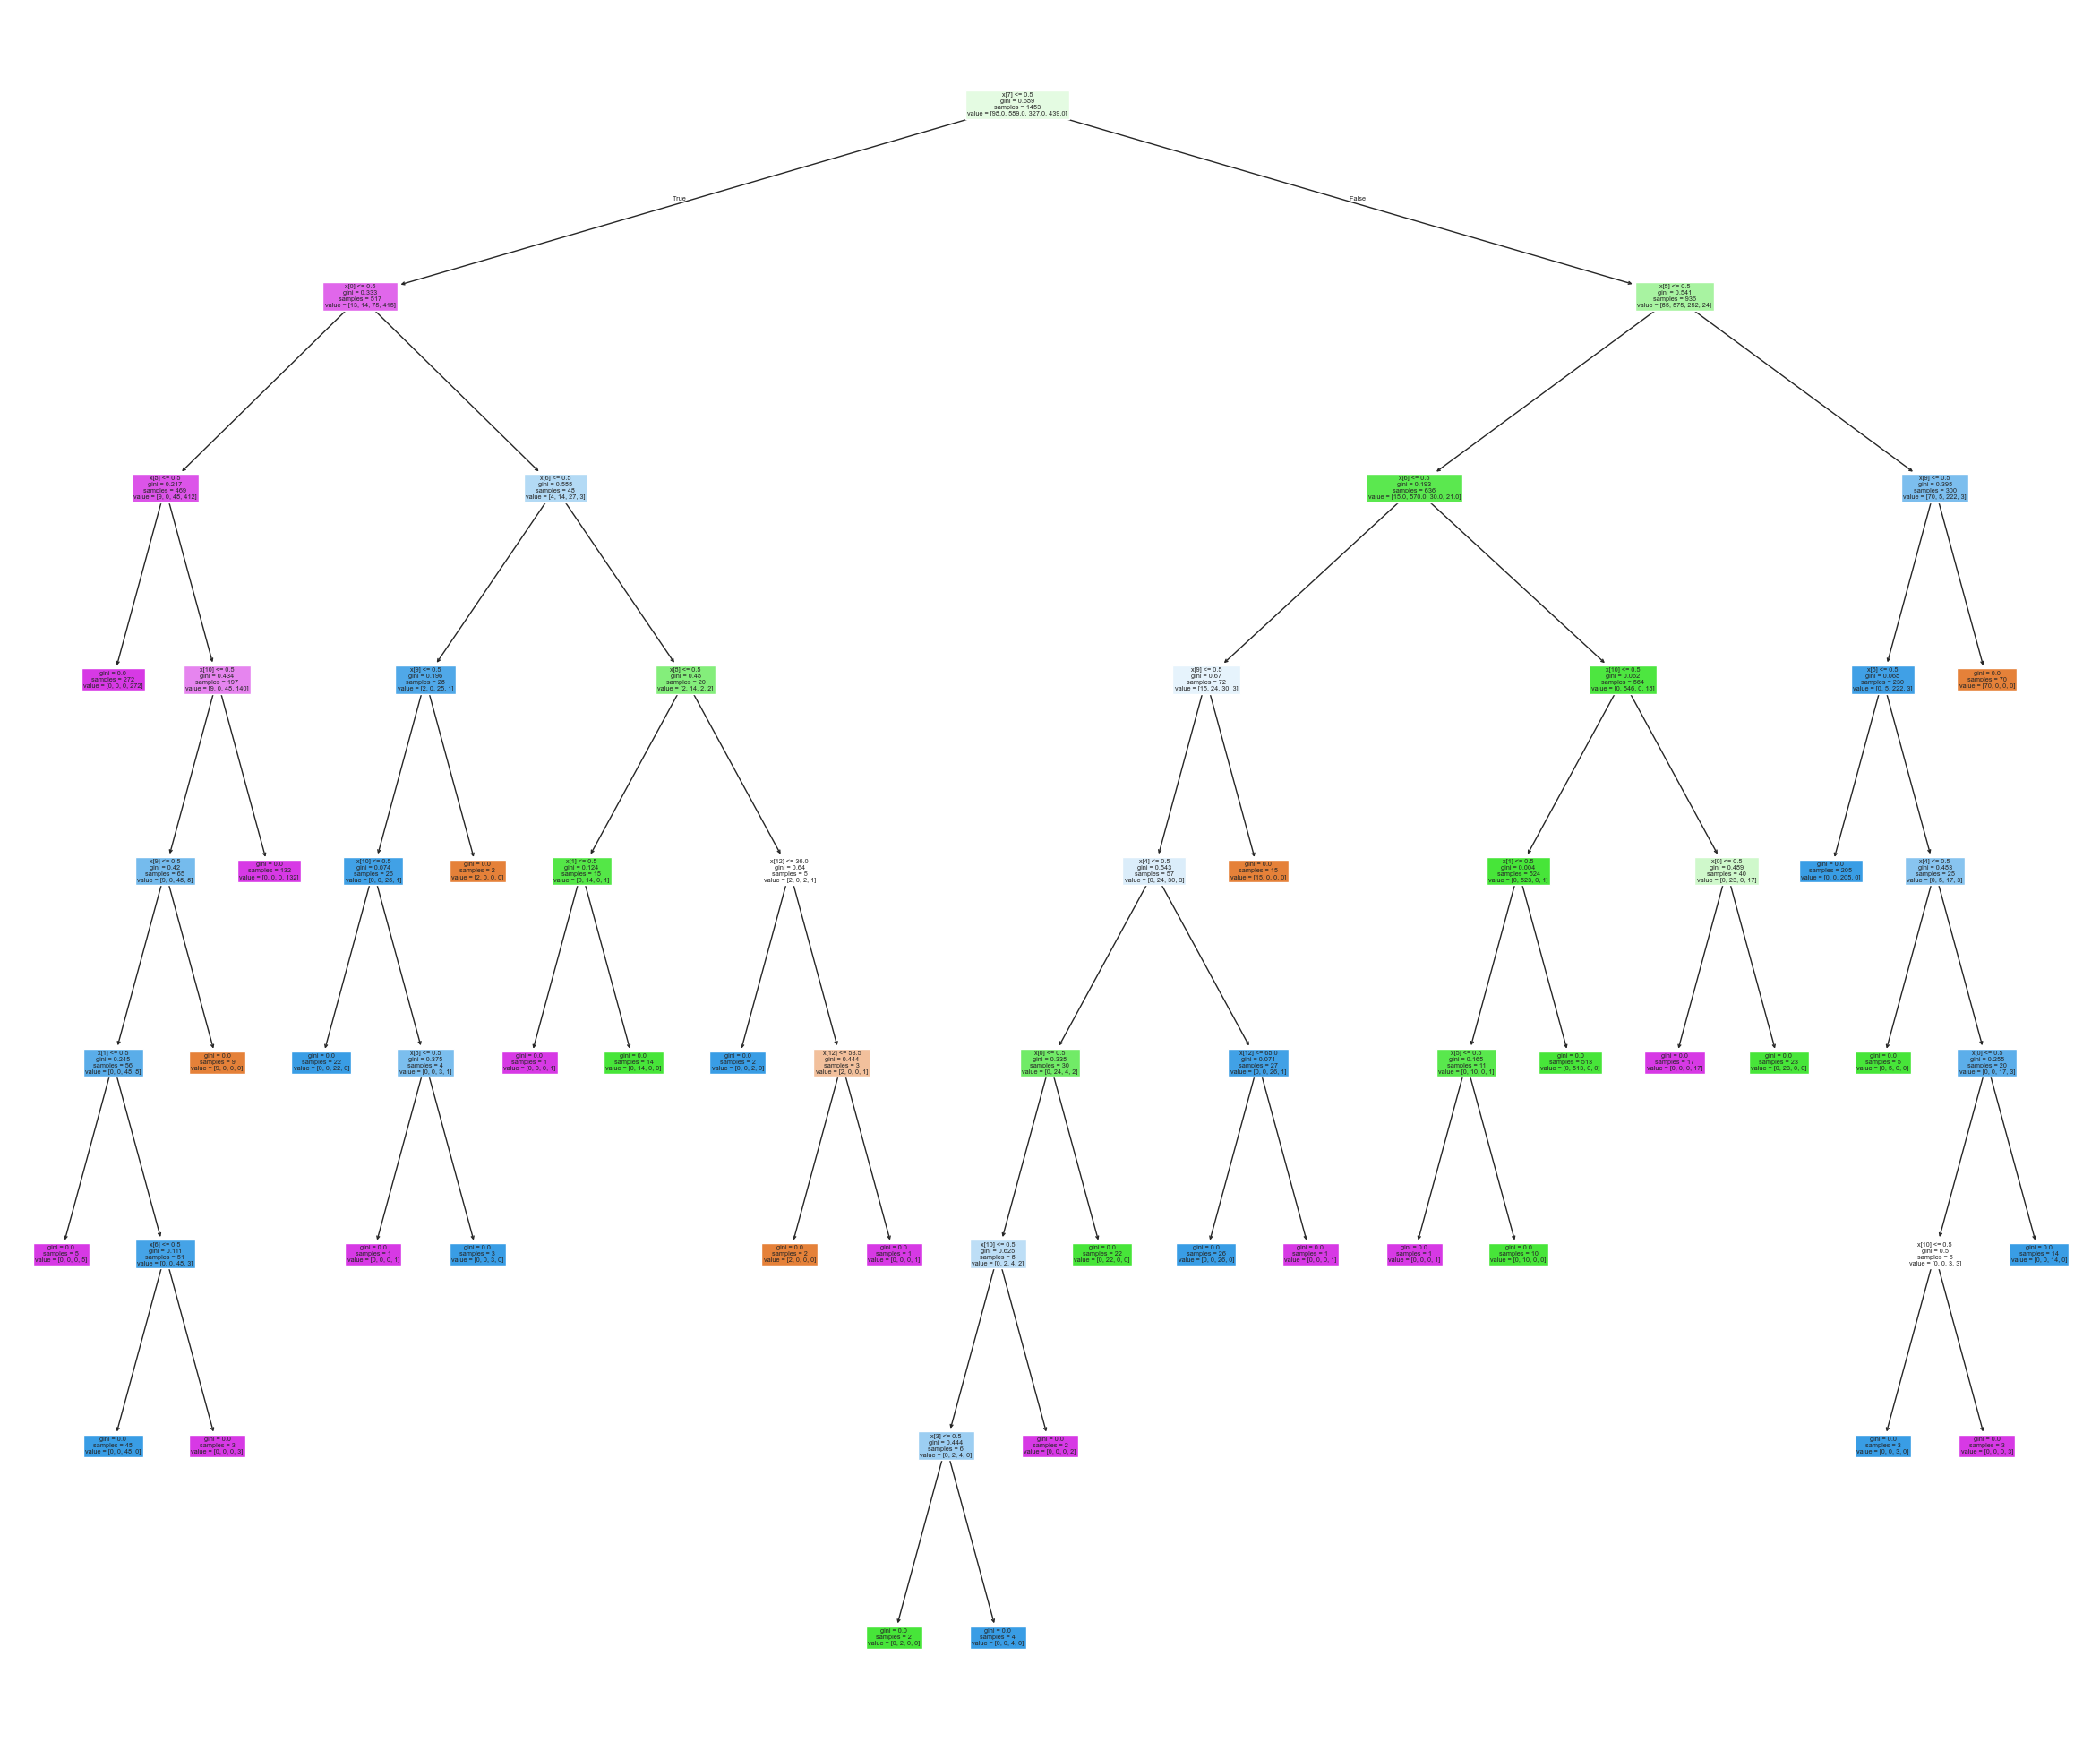

In [53]:
from sklearn import tree
fig = plt.figure(figsize=(30,25))
Tree = tree.plot_tree(decision_tree, filled=True)

In [54]:
import pickle
pickle.dump(decision_tree, open('model2.pkl','wb'))

In [55]:
loaded_model = pickle.load(open('model2.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result,'% Acuuracy')

1.0 % Acuuracy
